In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0117.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0101.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0108.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0110.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0119.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0115.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0116.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0105.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0106.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0121.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0111.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0103.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0120.jpeg
/kaggle/input/covid19-image-dataset/Co

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224] 

train_path = '../input/covid19-image-dataset/Covid19-dataset/train'
valid_path = '../input/covid19-image-dataset/Covid19-dataset/test'
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


2022-03-24 00:35:15.225615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 00:35:15.308261: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 00:35:15.308943: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 00:35:15.310015: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 2s 0us/step


In [4]:
for layer in vgg.layers:
  layer.trainable=False

In [5]:
folders=glob( '../input/covid19-image-dataset/Covid19-dataset/train/*')

In [6]:
x=Flatten()(vgg.output)

prediction=Dense(len(folders),activation='softmax')(x)


model = Model(inputs=vgg.input, outputs=prediction)


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip = True,
                                    rotation_range=20,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('../input/covid19-image-dataset/Covid19-dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [11]:
test_set = test_datagen.flow_from_directory('../input/covid19-image-dataset/Covid19-dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 66 images belonging to 3 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-03-24 00:35:24.900677: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-03-24 00:35:28.959116: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


8/8 [==============================] - 29s 3s/step - loss: 1.8540 - accuracy: 0.4582 - val_loss: 0.9980 - val_accuracy: 0.4848
Epoch 2/15
8/8 [==============================] - 14s 2s/step - loss: 0.8630 - accuracy: 0.6932 - val_loss: 0.7361 - val_accuracy: 0.6364
Epoch 3/15
8/8 [==============================] - 14s 2s/step - loss: 0.5376 - accuracy: 0.8088 - val_loss: 0.3561 - val_accuracy: 0.8333
Epoch 4/15
8/8 [==============================] - 13s 2s/step - loss: 0.4001 - accuracy: 0.8446 - val_loss: 0.2455 - val_accuracy: 0.9091
Epoch 5/15
8/8 [==============================] - 14s 2s/step - loss: 0.2681 - accuracy: 0.9163 - val_loss: 0.3003 - val_accuracy: 0.8636
Epoch 6/15
8/8 [==============================] - 13s 2s/step - loss: 0.2348 - accuracy: 0.9283 - val_loss: 0.1815 - val_accuracy: 0.8939
Epoch 7/15
8/8 [==============================] - 14s 2s/step - loss: 0.2087 - accuracy: 0.9163 - val_loss: 0.1574 - val_accuracy: 0.9394
Epoch 8/15
8/8 [=============================

In [13]:
r.history

{'loss': [1.8539958000183105,
  0.8630096316337585,
  0.5376406908035278,
  0.4001467227935791,
  0.26810938119888306,
  0.23477351665496826,
  0.20865240693092346,
  0.21508224308490753,
  0.20879408717155457,
  0.2203962653875351,
  0.19821737706661224,
  0.11927212029695511,
  0.13959619402885437,
  0.15640799701213837,
  0.131731316447258],
 'accuracy': [0.45816734433174133,
  0.6932271122932434,
  0.8087649345397949,
  0.8446215391159058,
  0.9163346886634827,
  0.9282868504524231,
  0.9163346886634827,
  0.9163346886634827,
  0.9203187227249146,
  0.9163346886634827,
  0.9362549781799316,
  0.9681274890899658,
  0.9482071995735168,
  0.9601593613624573,
  0.9561753273010254],
 'val_loss': [0.9980393648147583,
  0.7361092567443848,
  0.35614803433418274,
  0.2455323189496994,
  0.3002564013004303,
  0.18146052956581116,
  0.1574377715587616,
  0.14900195598602295,
  0.1743869036436081,
  0.18570712208747864,
  0.1553301066160202,
  0.23436091840267181,
  0.19449284672737122,
  0.1

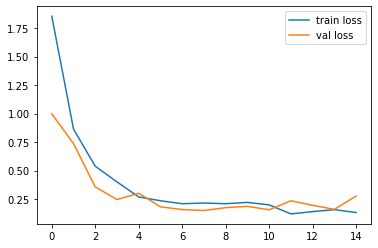

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

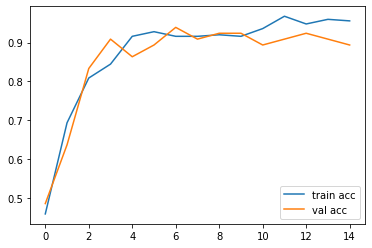

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
y_pred=model.predict(test_set)
y_pred

array([[2.92064063e-02, 9.28598225e-01, 4.21953797e-02],
       [1.91695173e-04, 1.06930487e-01, 8.92877877e-01],
       [9.75163817e-01, 2.56854546e-04, 2.45792437e-02],
       [9.87285912e-01, 1.32838753e-03, 1.13857193e-02],
       [9.77455139e-01, 9.93519672e-04, 2.15514284e-02],
       [1.87297264e-04, 8.04642618e-01, 1.95170060e-01],
       [2.28536184e-04, 6.36453256e-02, 9.36126173e-01],
       [2.74417427e-04, 8.70371580e-01, 1.29354000e-01],
       [7.01482277e-05, 5.69137275e-01, 4.30792540e-01],
       [9.77455139e-01, 9.93519672e-04, 2.15514284e-02],
       [1.06916390e-03, 7.62537448e-03, 9.91305411e-01],
       [3.42513958e-05, 6.02778928e-05, 9.99905467e-01],
       [9.95797753e-01, 2.14150961e-04, 3.98818264e-03],
       [8.88671668e-04, 1.76393073e-02, 9.81472015e-01],
       [9.86071408e-01, 7.14083535e-06, 1.39214536e-02],
       [1.82384640e-04, 7.25574315e-01, 2.74243265e-01],
       [5.29845056e-06, 6.39439188e-03, 9.93600368e-01],
       [3.88949184e-06, 7.03945